<a href="https://colab.research.google.com/github/Aditya02sant/OIBSIP/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

# **Car Price Prediction with Machine Learning**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Upload the Dataset

In [ ]:

from google.colab import files

uploaded = files.upload()


dataset = pd.read_csv(next(iter(uploaded)))


Saving car_data.csv to car_data (1).csv


Explore the Dataset

In [ ]:

print(dataset.head())


print(dataset.describe())


print(dataset.isnull().sum())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0

Plot the Distribution of Target Variable

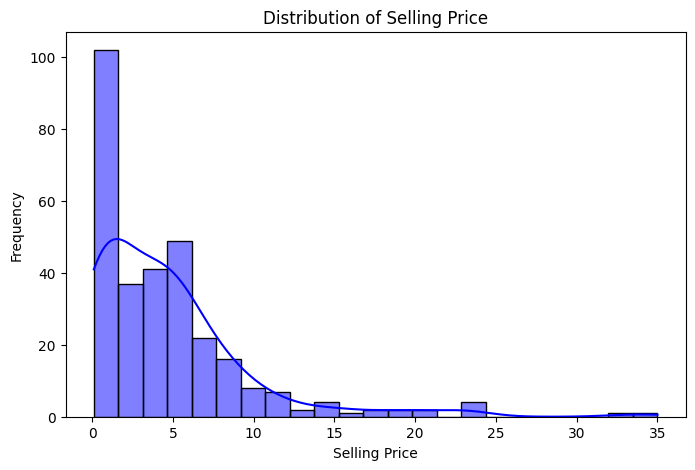

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(dataset['Selling_Price'], kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


Visualize Relationships

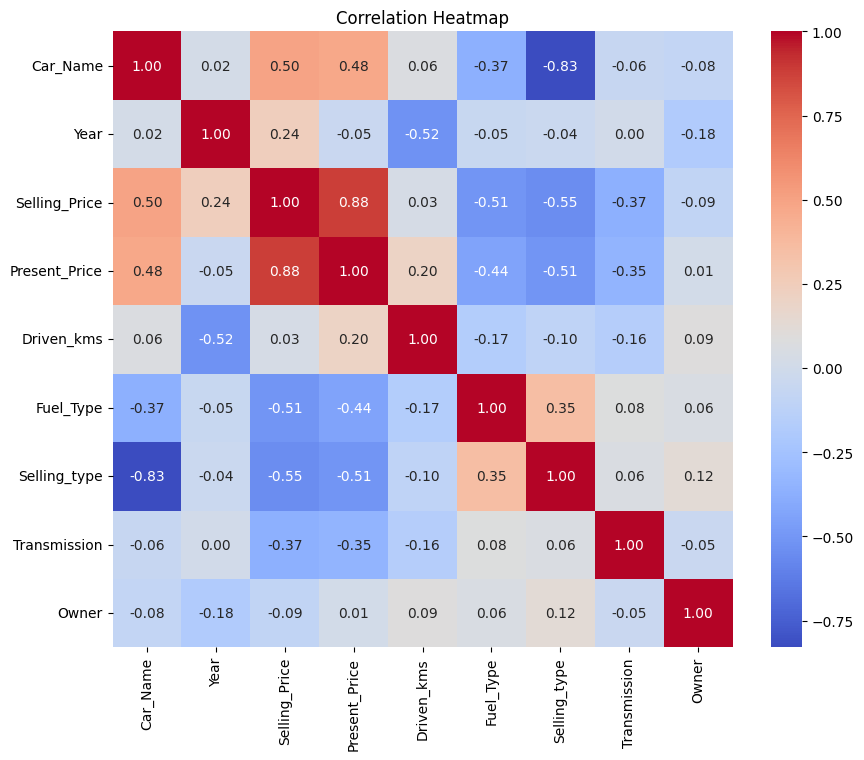

In [ ]:

from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in dataset.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])


plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Pairplot

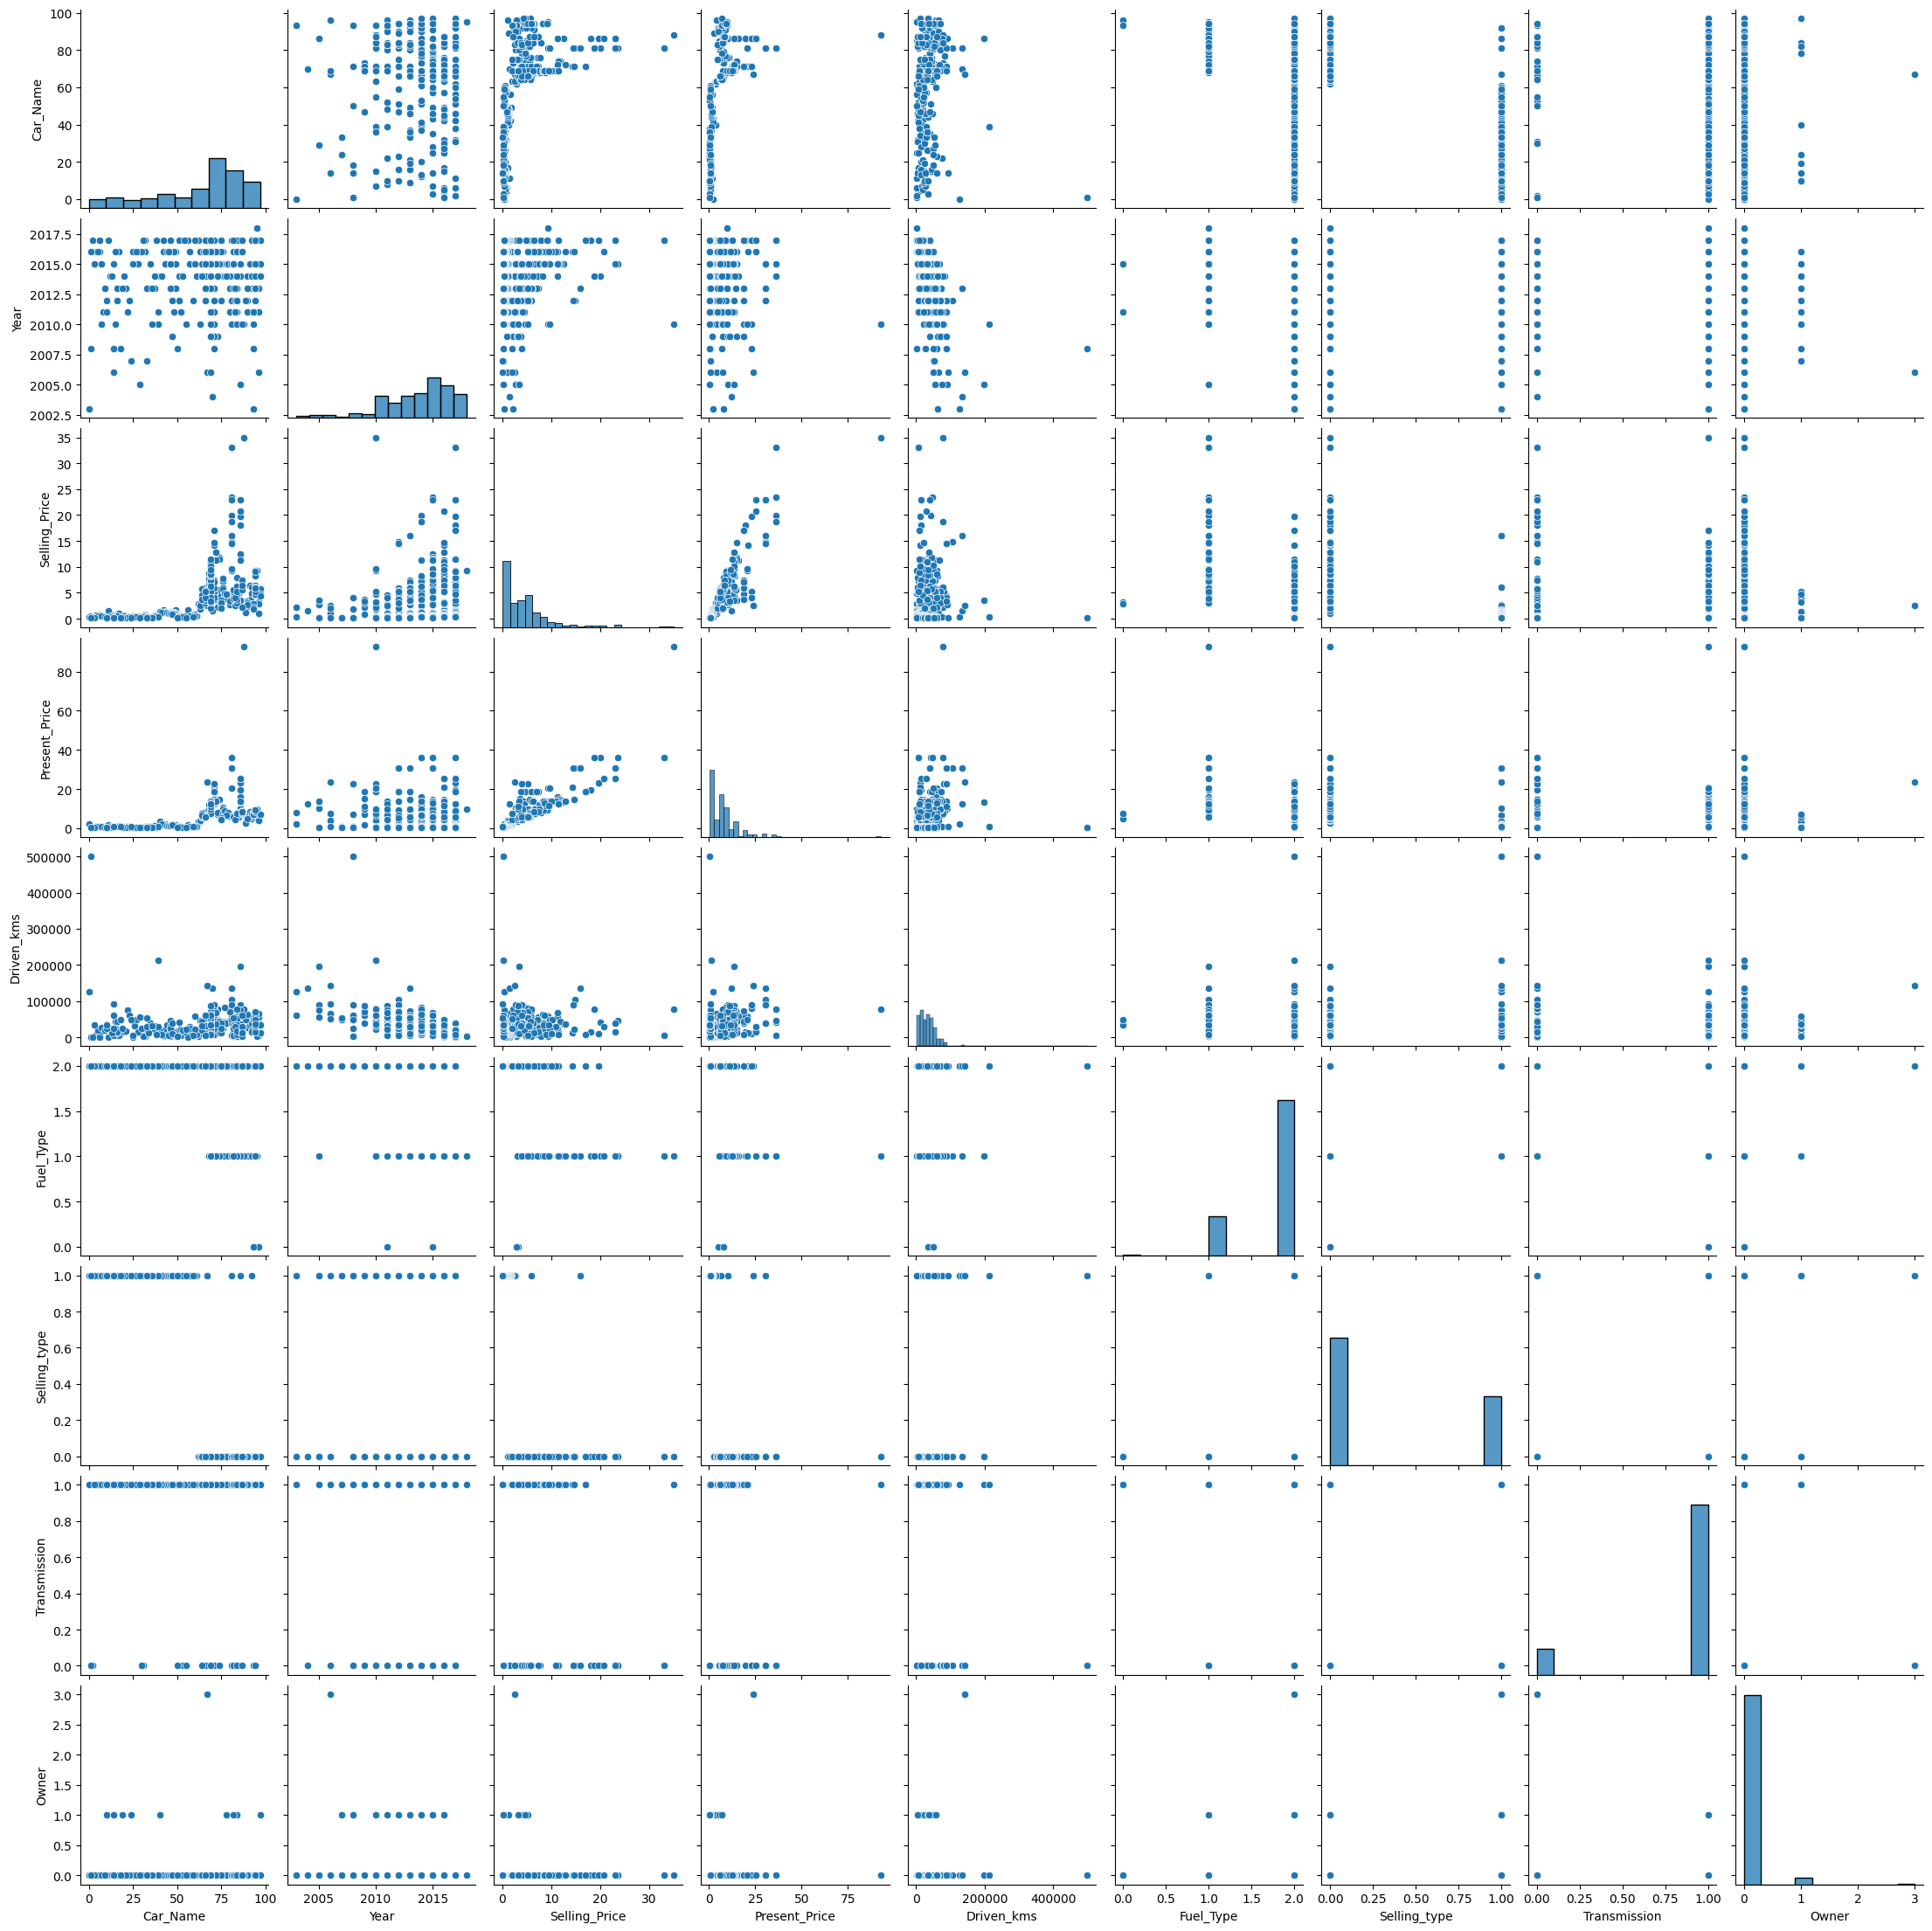

In [ ]:

sns.pairplot(dataset)
plt.show()


Handle Missing Values

In [ ]:
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


Encode Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])


Define Features (X) and Target (y)

In [ ]:
X = dataset.drop(columns=['Selling_Price'])
y = dataset['Selling_Price']


Split Data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Machine Learning Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Evaluate Model Performance

Mean Squared Error: 3.537020423742584
R2 Score: 0.8464540623821766


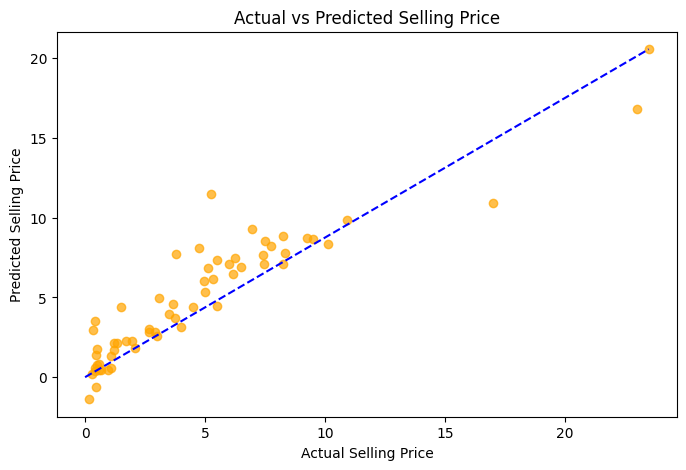

In [ ]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='blue', linestyle='--')
plt.show()


Feature Importance

<ipython-input-29-9aab37d28326>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


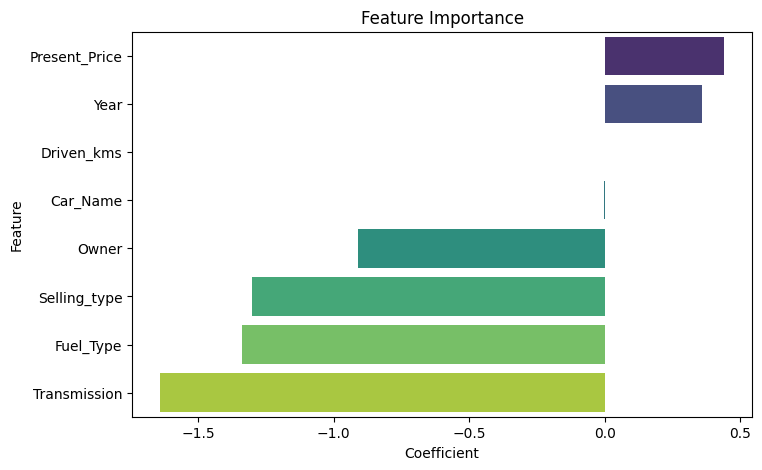

In [ ]:

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance')
plt.show()


Save the Model


In [ ]:
import joblib


joblib.dump(model, 'car_price_prediction_model.pkl')


['car_price_prediction_model.pkl']